# step1: load the dataset usung pandas library


In [1]:
# import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('pima-data.xlsx')
df

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes_orig,skin,has_diabetes,diabetes
0,6,148,72,35,0,33.6,0.627,50,1,1.3790,True,True
1,1,85,66,29,0,26.6,0.351,31,0,1.1426,False,False
2,8,183,64,0,0,23.3,0.672,32,1,0.0000,True,True
3,1,89,66,23,94,28.1,0.167,21,0,0.9062,False,False
4,0,137,40,35,168,43.1,2.288,33,1,1.3790,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1.8912,False,False
764,2,122,70,27,0,36.8,0.340,27,0,1.0638,False,False
765,5,121,72,23,112,26.2,0.245,30,0,0.9062,False,False
766,1,126,60,0,0,30.1,0.349,47,1,0.0000,True,True


In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\StayAlive\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [4]:
df=pd.read_excel('pima-data.xlsx')
df

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes_orig,skin,has_diabetes,diabetes
0,6,148,72,35,0,33.6,0.627,50,1,1.3790,True,True
1,1,85,66,29,0,26.6,0.351,31,0,1.1426,False,False
2,8,183,64,0,0,23.3,0.672,32,1,0.0000,True,True
3,1,89,66,23,94,28.1,0.167,21,0,0.9062,False,False
4,0,137,40,35,168,43.1,2.288,33,1,1.3790,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1.8912,False,False
764,2,122,70,27,0,36.8,0.340,27,0,1.0638,False,False
765,5,121,72,23,112,26.2,0.245,30,0,0.9062,False,False
766,1,126,60,0,0,30.1,0.349,47,1,0.0000,True,True


In [3]:
df.shape

(768, 12)

In [5]:
pd.set_option('display.max_rows',None)
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'diabetes_orig', 'skin', 'has_diabetes',
       'diabetes'],
      dtype='object')

# finding the null values

In [7]:
df.isnull().values.any()

False

In [8]:
df.isnull().values.sum()

0

# Finding the correlation between the columns

In [12]:
def plot_corr(df, size=12):
    corr=df.corr()
    cmap='plasma'
    fig,ax=plt.subplots(figsize=(size,size))
    ax.matshow(corr,cmap=cmap)
    plt.xticks(range(len(corr.columns)),corr.columns, rotation=20)
    plt.yticks(range(len(corr.columns)),corr.columns)

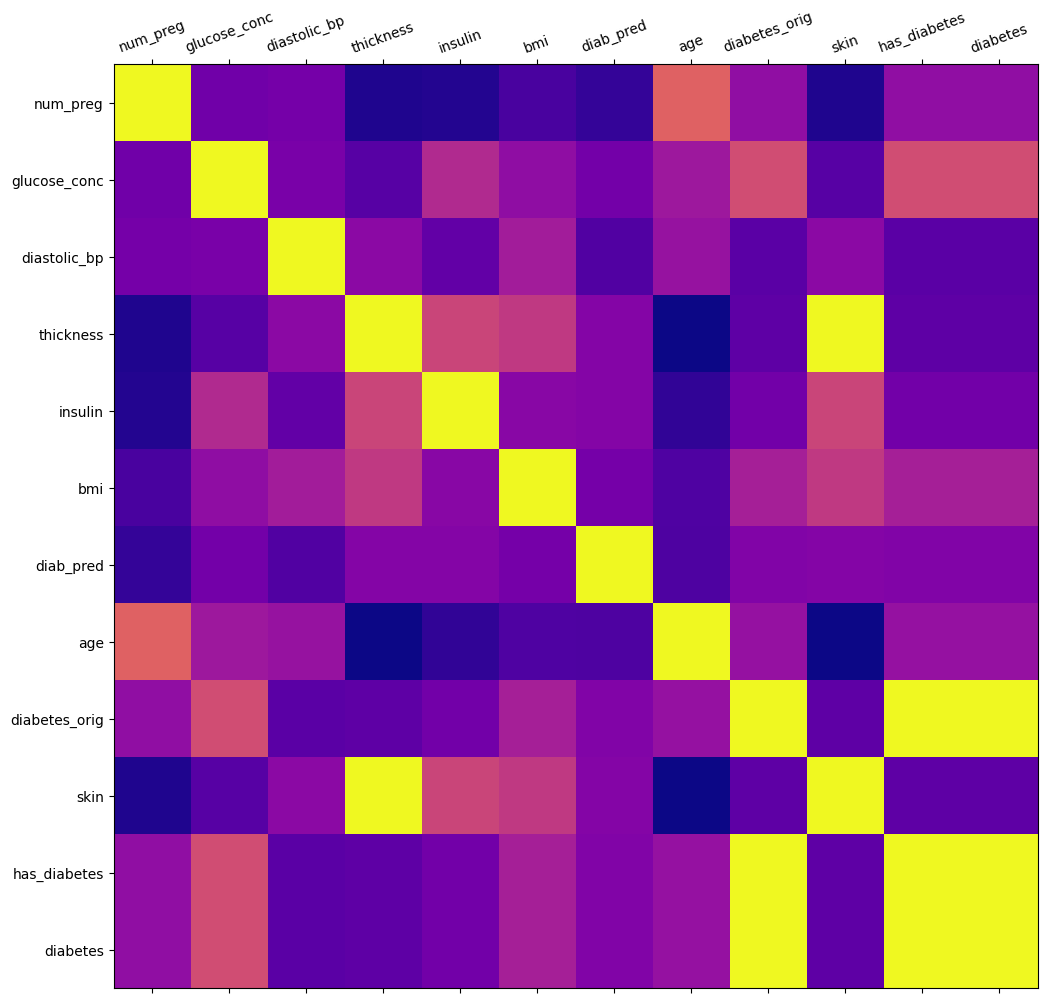

In [13]:
plot_corr(df)

# drop the correlated columns

In [ ]:
## corelated columns
## thickness and skin are corelated to each other
## diabetes_origin and has diabetes are corelated to each other
## diabetes_origin and diabetes are corelated to each other
## has_diabetes and diabetes are corelated to each other

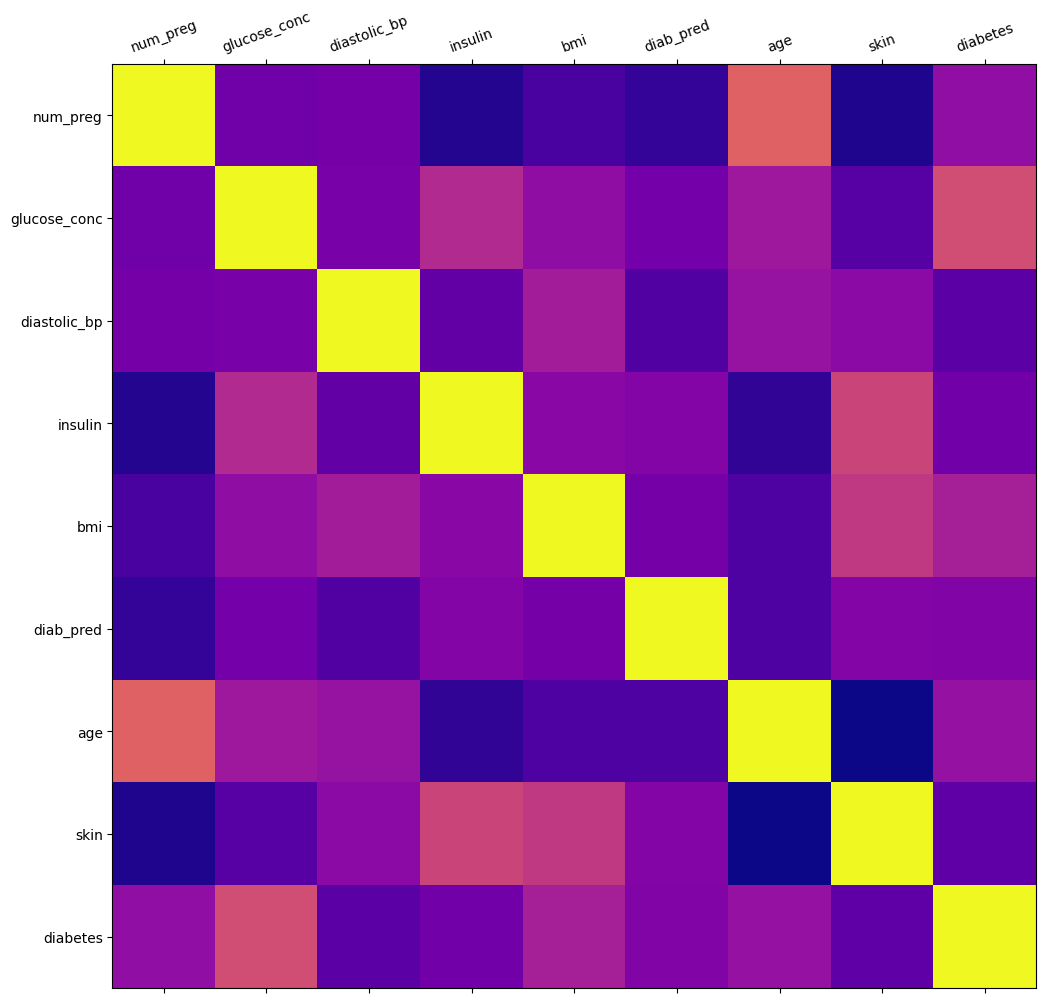

In [14]:
# 3. drop the corelated columns
df.drop('thickness',axis=1,inplace=True)
df.drop('has_diabetes',axis=1,inplace=True)
df.drop('diabetes_orig',axis=1,inplace=True)
plot_corr(df)


In [15]:
df.head()

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,True
1,1,85,66,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,23.3,0.672,32,0.0000,True
3,1,89,66,94,28.1,0.167,21,0.9062,False
4,0,137,40,168,43.1,2.288,33,1.3790,True


## convert text to integer

In [ ]:
# create a dictionary to convert True to 1 and False to 0
# Want to replace True and False in diabetes column
dict1={
    'diabetes':[True,False]
}
dict2={
    'diabetes':[1,0]
}


In [17]:
df.replace(dict1,dict2,inplace=True)
df.head()

C:\Users\StayAlive\AppData\Local\Temp\ipykernel_3240\2687835138.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(dict1,dict2,inplace=True)


,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,1
1,1,85,66,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,23.3,0.672,32,0.0000,1
3,1,89,66,94,28.1,0.167,21,0.9062,0
4,0,137,40,168,43.1,2.288,33,1.3790,1


In [23]:
num_true = len(df.loc [df['diabetes']==1])

num_false = len(df.loc [df['diabetes']==0])

print(f'num_truê= {num_true}')

print(f'num false {num_false}')

per_num_true = (num_true / (num_true+num_false))*100

print(per_num_true)

per_num_false= (num_false/(num_false+num_true))*100

print(per_num_false)

num_truê= 268
num false 500
34.89583333333333
65.10416666666666
